In [1]:
# Import Python packages
import pickle

# Third-Party Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def score_p(results, true_coeffs):
    for result in results:
        len_diff = int((len(true_coeffs['p'])-len(result['p']))/2)
        diff = true_coeffs['p'][len_diff:-len_diff] - result['p']
        score = np.linalg.norm(diff)
        score = score/np.linalg.norm(true_coeffs['p'][len_diff:-len_diff])
        result['score'] = score
    return results

In [7]:
tags = ["S1", "NLSL", "S3", "S4"]
true_files = ["S1-LSL-coeffs.pickle","S2-NLSL-coeffs.pickle","S3-P2-coeffs.pickle","S4-EB-coeffs.pickle"]

# Create empty list for plotting
plot_lists = []

# Prepare the results list
for tag, tf in zip(tags, true_files):
    # define file stem, load data, compute spurious terms
    file_stem = "./data/Fig5a-{}-".format(tag)
    
    true_coeffs = pickle.load(open("./data/{}".format(tf), "rb"))
    
    results = pickle.load(open(file_stem +"results.pickle", "rb"))

    # Prepare lists for plotting
    plot_nm = [result['noise_mag'] for result in results]
    results = score_p(results, true_coeffs)
    plots_sc = [result['score'] for result in results]
    plots_sc = [min(score,1) for score in plots_sc]
    
    # save to plot_lists:
    plot_lists.append([plot_nm, plots_sc])

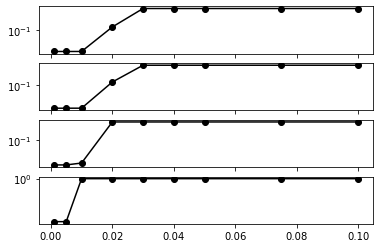

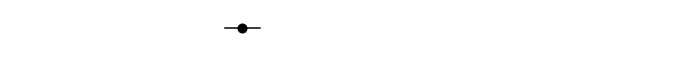

In [8]:
import matplotlib as mpl
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 20
pltstyle=dict(linestyle=None,marker='o')
figsize = (6,4)


# Create figure
fig, axs = plt.subplots(4,1, sharex=True, figsize=figsize)

axs = axs.flatten()

for ax1, plot_list in zip(axs,plot_lists):
    # Get the results:
    plot_nm, plots_sc = plot_list
    
    # plot data
    ax1.semilogy(plot_nm, plots_sc, color='black', label = "p(x) Error", **pltstyle)
 
    # Place the legend
    lines = ax1.get_lines()
    labels = [line.get_label() for line in lines]
    labels = ['' for line in lines]
    
    # adjust axis scales
    #ax1.tick_params(labelbottom=False, labelleft=False)
    #ax1.set_ylim([0.01,5])

    
# Create separate axes
legend_figsize = (figsize[0]*2, figsize[1]/5)
plt.figure(figsize=legend_figsize)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
plt.legend(lines, labels, ncol=2, loc='center', frameon=False)


plt.show()

# FIGURE 5B Below:

In [9]:
# Create empty list for plotting
plot_lists = []

# Prepare the results list
for tag, tf in zip(tags, true_files):
    # define file stem, load data, compute spurious terms
    file_stem = "./data/Fig5b-{}-".format(tag)
    
    true_coeffs = pickle.load(open("./data/{}".format(tf), "rb"))
    
    results = pickle.load(open(file_stem +"results.pickle", "rb"))

    # Prepare lists for plotting
    plot_trials = [result['num_trials'] for result in results]
    results = score_p(results, true_coeffs)
    plots_sc = [result['score'] for result in results]
    plots_sc = [min(score,1) for score in plots_sc]
    
    # save to plot_lists:
    plot_lists.append([plot_trials, plots_sc])

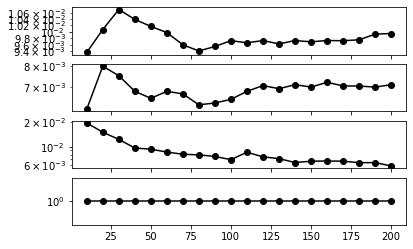

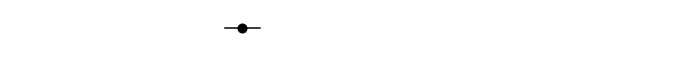

In [10]:
import matplotlib as mpl
mpl.rcParams["legend.markerscale"] = 1.5
mpl.rcParams["legend.labelspacing"] = 1.2
mpl.rcParams["legend.handlelength"] = 3.5
mpl.rcParams["legend.handletextpad"] = 20
pltstyle=dict(linestyle=None,marker='o')
figsize = (6,4)


# Create figure
fig, axs = plt.subplots(4,1, sharex=True, figsize=figsize)

axs = axs.flatten()

for ax1, plot_list in zip(axs,plot_lists):
    # Get the results:
    plot_trials, plots_sc = plot_list
    
    # plot data
    ax1.semilogy(plot_trials, plots_sc, 'o-', color='k')
    
    # Place the legend
    lines = ax1.get_lines()
    labels = [line.get_label() for line in lines]
    labels = ['' for line in lines]
    
    # adjust axis scales
    #ax1.tick_params(labelbottom=False, labelleft=False)
    #ax1.set_ylim([0.01,5])

    
# Create separate axes
legend_figsize = (figsize[0]*2, figsize[1]/5)
plt.figure(figsize=legend_figsize)
ax = plt.gca()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(labelleft=False, labelbottom=False, left=False, bottom=False)
plt.legend(lines, labels, ncol=2, loc='center', frameon=False)


plt.show()